## 0) Load iris as dataframe

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

## 1) Split data into train/test sets

In [2]:
from sklearn.model_selection import train_test_split

train_iris, test_iris = train_test_split(iris, train_size=0.75)
print(len(train_iris))
print(len(test_iris))
      

112
38


## 2) Split a dataframe into parts based on levels of a categorical variable

Via: [Nate Solon](https://twitter.com/natesolon)

In [12]:
split_dict = {name:group for name, group in iris.groupby('species')}
setosa = split_dict['setosa']
versicolor = split_dict['versicolor']
virginica = split_dict['virginica']

## 3) Conditional column creation/editing

In [11]:
import numpy as np

iris['new_column_basic'] = 'cat'
iris['new_column_conditional'] = np.where(iris['species'] == "setosa", "this is setosa", 'this is not')
iris = iris.sample(frac=1) ## just to scrable the order
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_column_basic,new_column_conditional
131,7.9,3.8,6.4,2.0,virginica,cat,this is not
111,6.4,2.7,5.3,1.9,virginica,cat,this is not
96,5.7,2.9,4.2,1.3,versicolor,cat,this is not
103,6.3,2.9,5.6,1.8,virginica,cat,this is not
33,5.5,4.2,1.4,0.2,setosa,cat,this is setosa


## 4) Change the backgrounds of plot

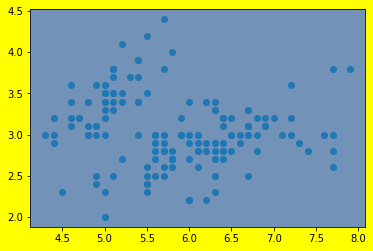

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_facecolor('yellow') ## string for color
ax = fig.add_subplot()
ax.set_facecolor('#7392B7') ## hex for color
plt.scatter(iris['sepal_length'], iris['sepal_width'])

## 5) Change the backgrounds of plot

In [2]:
## can just add more variables to groupby call as well
iris_results = (iris
                .groupby(['species'])[['sepal_length', 'sepal_width', 'petal_length']]
                     .agg({'sepal_length': ['count', 'sum'],
                           'sepal_width': ['mean'],
                           'petal_length': ['max']}))

iris_results.columns = ['n', 'sepal_length_sum', 'sepal_width_mean', 'petal_length_max']
iris_results.reset_index() ## don't forget this!

,species,n,sepal_length_sum,sepal_width_mean,petal_length_max
0,setosa,50,250.3,3.428,1.9
1,versicolor,50,296.8,2.770,5.1
2,virginica,50,329.4,2.974,6.9


## 6) Get a linear regression summary table

In [3]:
import statsmodels.api as sm ## THIS IS NOT AVAILABLE IN SKLEARN

## !!! Y, X unlike sklearn !!!
model = sm.OLS(iris['sepal_length'], iris['sepal_width']).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sepal_length   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              3277.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):                   2.42e-103
Time:                        09:42:39   Log-Likelihood:                         -243.98
No. Observations:                 150   AIC:                                      490.0
Df Residuals:                     149   BIC:                                      493.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sepal_width     1.8690      0.033     57.246      0.000       1.804       1.934
==============================================================================
Omnibus:                       18.144   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.909
Skew:                          -0.338   Prob(JB):                       0.0192
Kurtosis:                       2.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""